In [1]:
import pyAgrum as gum

In [2]:
#definition du reseau
bn=gum.BayesNet('monJardin')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}


In [3]:
id_a=bn.add(gum.LabelizedVariable('a','arrosseur ?',2))  #definitiion de la varible aleatoire liée a l'arrosseur
id_p=bn.add(gum.LabelizedVariable('p','pluie ?',2))  #definitiion de la varible aleatoire liée a la pluie
id_j=bn.add(gum.LabelizedVariable('j','jardin ?',2))  #definitiion de la varible aleatoire liée a mon jardin
id_v=bn.add(gum.LabelizedVariable('v','voisin ?',2))  #definitiion de la varible aleatoire liée au jardin du voisin


In [4]:
print (id_a,id_p,id_j,id_v)
print (bn)

0 1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 4, mem: 64o}


In [5]:
#definition des dependances
for link in [(id_p,id_j),(id_p,id_v),(id_a,id_j)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 3, domainSize: 16, dim: 8, mem: 128o}


In [6]:
#visualisation du graphe
import pyAgrum.lib.notebook as gnb
bn

(pyAgrum.BayesNet@000001BFAB3C4CE0) BN{nodes: 4, arcs: 3, domainSize: 16, dim: 8, mem: 128o}

In [7]:
#definition des probabilités associées à p
bn.cpt(id_p).fillWith([0.5,0.5])

(pyAgrum.Potential@000001BFAB343260) 
  p                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [8]:
#definition des probabilités associées à a
bn.cpt(id_a).fillWith([0.5,0.5])

(pyAgrum.Potential@000001BFAB343080) 
  a                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [9]:
#definition des probabilités associées à v
bn.cpt("v")[:]=[ [.9,0.1],[0.1,.9]]
print(bn.cpt("v").names)
bn.cpt(id_v)


('v', 'p')


(pyAgrum.Potential@000001BFAB343300) 
      ||  v                |
p     ||0        |1        |
------||---------|---------|
0     || 0.9000  | 0.1000  |
1     || 0.1000  | 0.9000  |

In [10]:

print(bn.cpt("j").names)
bn.cpt("j")

('j', 'p', 'a')


(pyAgrum.Potential@000001BFAB3430E0) 
             ||  j                |
p     |a     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.0000  | 0.0000  |
1     |0     || 0.0000  | 0.0000  |
0     |1     || 0.0000  | 0.0000  |
1     |1     || 0.0000  | 0.0000  |

In [11]:
#definition des probabilités associées à j
bn.cpt("j")[{'p': 0, 'a': 0}] = [.9, 0.1]
bn.cpt("j")[{'p': 0, 'a': 1}] = [0.1, 0.9]
bn.cpt("j")[{'p': 1, 'a': 0}] = [0.1, 0.9]
bn.cpt("j")[{'p': 1, 'a': 1}] = [.1, .9]
bn.cpt("j")

(pyAgrum.Potential@000001BFAB3430E0) 
             ||  j                |
p     |a     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.9000  | 0.1000  |
1     |0     || 0.1000  | 0.9000  |
0     |1     || 0.1000  | 0.9000  |
1     |1     || 0.1000  | 0.9000  |

In [12]:
#initialisons l'algorithme d'inference
ie=gum.LazyPropagation(bn)


  j                |
0        |1        |
---------|---------|
 0.3000  | 0.7000  |



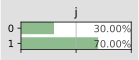


  v                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |



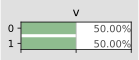


  a                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |



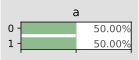


  p                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |



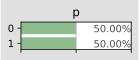

In [13]:
#quelle sont les probabilités a posteriori de j
ie.makeInference()
print (ie.posterior("j"))
gnb.showProba(ie.posterior("j"))
ie.makeInference()
print (ie.posterior("v"))
gnb.showProba(ie.posterior("v"))
print (ie.posterior("a"))
gnb.showProba(ie.posterior("a"))
print (ie.posterior("p"))
gnb.showProba(ie.posterior("p"))

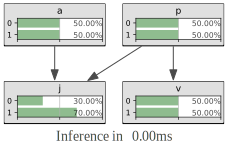

In [14]:
gnb.showInference(bn,evs={})

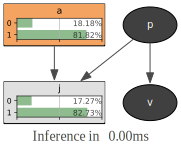

In [15]:
gnb.showInference(bn,evs={'a':[0.2,0.9]},targets={'a','j'})

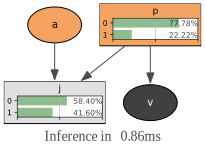

In [16]:
gnb.showInference(bn,evs={'p':[0.7,0.2], 'a':[0.7,0.2]},targets={'p','j'})

In [17]:
from IPython.core.display import HTML
HTML(f"Dans mon reseau bayesien, $P(J)=${ie.posterior('j')[:]}")

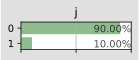

(pyAgrum.Potential@000001BFABFC68F0) 
  j                |
0        |1        |
---------|---------|
 0.9000  | 0.1000  |

In [18]:
ie.setEvidence({'p':0, 'a': 0}) #il n'a pas plu et mon arrosseur n'est pas allumé
ie.makeInference()
gnb.showProba(ie.posterior("j"))
ie.posterior("j")


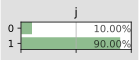

(pyAgrum.Potential@000001BFABEFF0D0) 
  j                |
0        |1        |
---------|---------|
 0.1000  | 0.9000  |

In [19]:
ie.setEvidence({'p':0, 'a': 1}) #il n'a pas plu et mon arrosseur est  allumé
ie.makeInference()
gnb.showProba(ie.posterior("j"))
ie.posterior("j")

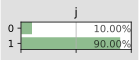

(pyAgrum.Potential@000001BFABEFF2B0) 
  j                |
0        |1        |
---------|---------|
 0.1000  | 0.9000  |

In [20]:
ie.setEvidence({'p':1, 'a': 1}) #il a  plu et mon arrosseur est  allumé
ie.makeInference()
gnb.showProba(ie.posterior("j"))
ie.posterior("j")

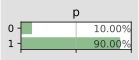

(pyAgrum.Potential@000001BFABEFC0B0) 
  p                |
0        |1        |
---------|---------|
 0.1000  | 0.9000  |

In [21]:
ie.setEvidence({'v':1}) #le jardin de mon voisin est mouillé
ie.makeInference()
gnb.showProba(ie.posterior("p"))
ie.posterior("p")

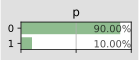

(pyAgrum.Potential@000001BFABFC8FD0) 
  p                |
0        |1        |
---------|---------|
 0.9000  | 0.1000  |

In [22]:
ie.setEvidence({'v':0}) #le jardin de mon voisin n'est pas mouillé
ie.makeInference()
gnb.showProba(ie.posterior("p"))
ie.posterior("p")

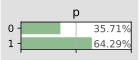

(pyAgrum.Potential@000001BFABFC4650) 
  p                |
0        |1        |
---------|---------|
 0.3571  | 0.6429  |

In [23]:
ie.setEvidence({'j':1}) #mon jardin est mouillé
ie.makeInference()
gnb.showProba(ie.posterior("p"))
ie.posterior("p")

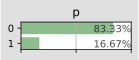

(pyAgrum.Potential@000001BFABEFC450) 
  p                |
0        |1        |
---------|---------|
 0.8333  | 0.1667  |

In [24]:
ie.setEvidence({'j':0}) #mon jardin n'est pas mouillé
ie.makeInference()
gnb.showProba(ie.posterior("p"))
ie.posterior("p")

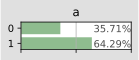

(pyAgrum.Potential@000001BFABEFCD70) 
  a                |
0        |1        |
---------|---------|
 0.3571  | 0.6429  |

In [25]:
ie.setEvidence({'j':1}) #mon jardin est mouillé
ie.makeInference()
gnb.showProba(ie.posterior("a"))
ie.posterior("a")

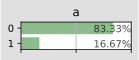

(pyAgrum.Potential@000001BFAB3454C0) 
  a                |
0        |1        |
---------|---------|
 0.8333  | 0.1667  |

In [26]:
ie.setEvidence({'j':0}) #mon jardin n'est pas mouillé
ie.makeInference()
gnb.showProba(ie.posterior("a"))
ie.posterior("a")

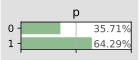

(pyAgrum.Potential@000001BFABEFD310) 
  a                |
0        |1        |
---------|---------|
 0.6429  | 0.3571  |

In [27]:
ie.setEvidence({'j':0, 'v': 1}) #mon jardin n'est pas mouillé
ie.makeInference()
gnb.showProba(ie.posterior("p"))
ie.posterior("a")

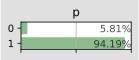

(pyAgrum.Potential@000001BFABEFDE90) 
  a                |
0        |1        |
---------|---------|
 0.4767  | 0.5233  |

In [28]:
ie.setEvidence({'j':1, 'v': 1}) #mon jardin est  mouillé et ce
ie.makeInference()
gnb.showProba(ie.posterior("p"))
ie.posterior("a")

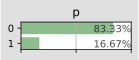

(pyAgrum.Potential@000001BFABFC7DB0) 
  a                |
0        |1        |
---------|---------|
 0.1667  | 0.8333  |

In [29]:
ie.setEvidence({'j':1, 'v': 0}) #mon jardin n'est pas mouillé
ie.makeInference()
gnb.showProba(ie.posterior("p"))
ie.posterior("a")